# Finetune your Neural Network and save it

🎯 Goals of this challenge:
    
1. ⚙️ **Finetune the optimizer** of a neural network
2. 💾 **Save**/**Load** a trained neural network

👩🏻‍🏫 Now that you have solid foundations about what Neural Networks are, how to design their architecture and how to prevent them from overfitting, let's take a closer look at the **`.compile(loss = ..., metrics = ..., activation = ...)`** part.

## (0) The Boston Housing Dataset

📚 ***Tensorflow.Keras*** has several built-in dataset that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

🏠 Among them, we are going to use the **`Boston Housing Dataset`**:
- our mission is to ***predict the values of the houses in k USD***
- and we will measure the performance of our model (s) using the _Mean Absolute Error (MAE)_ metrics.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### (0.1) Loading the dataset

In [2]:
# The Boston Housing Dataset from Keras
from tensorflow.keras.datasets import boston_housing

2022-05-24 15:51:20.140644: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 15:51:20.140744: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Loading the dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [4]:
# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

### (0.2) Quick glance at the target

<AxesSubplot:ylabel='Count'>

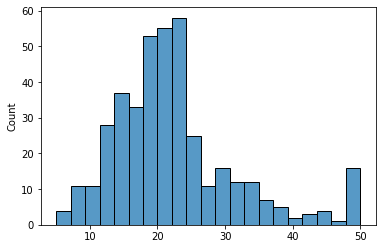

In [5]:
# Distribution of the houses' prices in the training set
sns.histplot(y_train)

In [6]:
# Null values and types of each feature:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [7]:
# Statistics about the numerical columns
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### (0.3) Minimal data preprocessing

👉 Here, we don't have any duplicates or missing values. Let's do the strict minimum of data preprocessing, _i.e._ ***scaling*** and move on quickly to the modelling phase.

❓ **Question: scaling your features** ❓ 

Standardize `X_train` and `X_test`.

In [8]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### (0.4) Baseline Model


🧑🏻‍🏫 In a regression task, **the baseline model always predicts the average value of `y_train`**

<details>
    <summary><i>Really ? </i></summary>
    
* 🐒 Yes in most cases...! we also like to call it _"dumbbest model"_ but _"baseline model"_ is more correct politically speaking :)
* ❗️ Be aware that this is not the only possible way of building a baseline model.
* 💹 ***In Time Series, the baseline model consists in predicting the last seen value***

❓ **Question: what would be the performance of the baseline model here ?** ❓ 

Before running any Machine Learning algorithm or advanced Deep Learning Neural Networks, it would be great to establish a benchmark score that you are supposed to beat. Otherwise, what is the point of running a fancy algorithm if you cannot beat this benchmark score on the test set (other than showing off) ? 

* Compute the Mean Absolute Error on the test set if your dumb prediction corresponds to the mean value of `y_train` computed on the train set.

In [15]:
a=np.empty(len(X_test)); a.fill(y_test.mean())

from sklearn.metrics import mean_absolute_error as mae
mae(a, y_test)

6.5990003844675105

## (1) The Neural Network

❓ **Question: initializing a Neural Network with a specific architecture** ❓

Write a function **`initialize_model`** that generates a Neural Network with 3 layers: 
- Input layer: 10 neurons, _"relu"_ activation function, and an the appropriate input dimension
- Hidden layer: 7 neurons and the _"relu"_ activation function
- Predictive layer: an appropriate layer corresponding to the problem we are trying to solve

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    
    ###########################################################################
    #--------------------------------architecture
    ###########################################################################
    
    model=models.Sequential()                                    #instanciate nn
    model.add(layers.Dense(10, activation="relu", input_dim=13)) #input layer
    model.add(layers.Dense(7, activation="relu"))               #hidden layer
    model.add(layers.Dense(1, activation="linear"))             #output layer
    
    return model

❓ **Question: number of parameters** ❓

How many parameters do have in this model ? 
1. Compute this number yourself
2. Double-check your answer with _model.summary()_

We already covered this question about the **number of parameters in a Fully Connected/Dense network** during **Deep Learning > 01. Fundamentals of Deep Learning** but it is always good to make sure you master the foundations of a new discipline 😉

In [25]:
model=initialize_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                140       
                                                                 
 dense_13 (Dense)            (None, 7)                 77        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


<details>
    <summary><i>Answer</i></summary>
    
* Each house has `X_train.shape[-1]` = 13 features
* Remember that a neuron is a linear activation combined with an activation so we will have 13 weights and 1 bias

1. First layer : 10 neurons $\times$ (13 weights + 1 bias ) = 140 params
2. Second layer : 7 neurons $\times$ (10 weights + 1 bias ) = 77 params
3. Third layer : 1 neuron $\times$ (7 weights + 1 bias) = 8 params
    
    
</details>

## (2) The optimizer



❓ **Question about the compiling method** ❓ 

Write a function that :
* takes as arguments _both_ a _model_ and an _optimizer_, 
* ***compiles*** the model,
* and returns the compiled model

Please select wisely:
* the _loss function_ to be optimized 
* and  the _metrics_ on which the model should be evaluated .

In [26]:
def compile_model(model, optimizer_name):
    
    model.compile(loss="mse", 
                  optimizer=optimizer_name, 
                  metrics=["mae"])
    
    return model

❓ **Question: evaluating the model** ❓ 

- Initialize the model and compile it with the `adam` optimizer 
- Fit it on the training data. 
- Evaluate your model on the test data.

Don't forget to use an Early Stopping criterion to avoid overfitting 

<details>
    <summary><i>Notes</i></summary>

As we saw in the _"How to prevent overfitting" challenge_,  you could also use L2 penalties and Dropout Layers to prevent overfitting but:
1. _Early Stopping is the easiest and quickest code to implement, you just declare _es = EarlyStopping(...)_ and you call it back in the _.fit()_ _
2. _The main goal of this challenge is to understand the impact of the optimizer_, so stay focused 😉
    
</details>

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(patience=30)

model=initialize_model()
model=compile_model(model,"adam")
history=model.fit(X_train, y_train, epochs=500, batch_size=16, callbacks=[es])
model.evaluate(X_test, y_test)


Epoch 1/500
26/26 [==============================] - 0s 1ms/step - loss: 589.9485 - mae: 22.3417
Epoch 2/500
26/26 [==============================] - 0s 1ms/step - loss: 575.8489 - mae: 22.0435
Epoch 3/500
26/26 [==============================] - 0s 1ms/step - loss: 562.8678 - mae: 21.7617
Epoch 4/500
26/26 [==============================] - 0s 1ms/step - loss: 549.6877 - mae: 21.4647
Epoch 5/500
26/26 [==============================] - 0s 913us/step - loss: 533.8819 - mae: 21.1100
Epoch 6/500
26/26 [==============================] - 0s 1ms/step - loss: 511.8723 - mae: 20.6251
Epoch 7/500
26/26 [==============================] - 0s 776us/step - loss: 483.5782 - mae: 19.9801
Epoch 8/500
26/26 [==============================] - 0s 863us/step - loss: 447.7729 - mae: 19.1556
Epoch 9/500
26/26 [==============================] - 0s 2ms/step - loss: 404.7149 - mae: 18.1206
Epoch 10/500
26/26 [==============================] - 0s 1ms/step - loss: 355.2091 - mae: 16.8364
Epoch 11/500
26/26 [===

26/26 [==============================] - 0s 882us/step - loss: 31.7895 - mae: 3.8894
Epoch 29/500
26/26 [==============================] - 0s 1ms/step - loss: 30.6622 - mae: 3.8303
Epoch 30/500
26/26 [==============================] - 0s 1ms/step - loss: 29.8076 - mae: 3.7853
Epoch 31/500
26/26 [==============================] - 0s 2ms/step - loss: 28.9468 - mae: 3.7448
Epoch 32/500
26/26 [==============================] - 0s 1ms/step - loss: 28.2901 - mae: 3.7103
Epoch 33/500
26/26 [==============================] - 0s 845us/step - loss: 27.5498 - mae: 3.6672
Epoch 34/500
26/26 [==============================] - 0s 1ms/step - loss: 26.8882 - mae: 3.6286
Epoch 35/500
26/26 [==============================] - 0s 789us/step - loss: 26.3388 - mae: 3.5953
Epoch 36/500
26/26 [==============================] - 0s 879us/step - loss: 25.7083 - mae: 3.5634
Epoch 37/500
26/26 [==============================] - 0s 772us/step - loss: 25.1855 - mae: 3.5365
Epoch 38/500
26/26 [=======================

26/26 [==============================] - 0s 820us/step - loss: 18.4206 - mae: 3.0922
Epoch 57/500
26/26 [==============================] - 0s 802us/step - loss: 18.1408 - mae: 3.0630
Epoch 58/500
26/26 [==============================] - 0s 922us/step - loss: 17.8300 - mae: 3.0353
Epoch 59/500
26/26 [==============================] - 0s 891us/step - loss: 17.5615 - mae: 3.0230
Epoch 60/500
26/26 [==============================] - 0s 1ms/step - loss: 17.3365 - mae: 2.9969
Epoch 61/500
26/26 [==============================] - 0s 963us/step - loss: 17.0418 - mae: 2.9534
Epoch 62/500
26/26 [==============================] - 0s 1ms/step - loss: 16.7826 - mae: 2.9230
Epoch 63/500
26/26 [==============================] - 0s 1000us/step - loss: 16.5689 - mae: 2.9052
Epoch 64/500
26/26 [==============================] - 0s 1ms/step - loss: 16.3592 - mae: 2.8819
Epoch 65/500
26/26 [==============================] - 0s 844us/step - loss: 16.0488 - mae: 2.8509
Epoch 66/500
26/26 [==================

26/26 [==============================] - 0s 826us/step - loss: 12.6188 - mae: 2.5178
Epoch 84/500
26/26 [==============================] - 0s 845us/step - loss: 12.4299 - mae: 2.4937
Epoch 85/500
26/26 [==============================] - 0s 814us/step - loss: 12.2947 - mae: 2.4806
Epoch 86/500
26/26 [==============================] - 0s 996us/step - loss: 12.1746 - mae: 2.4717
Epoch 87/500
26/26 [==============================] - 0s 825us/step - loss: 12.0341 - mae: 2.4606
Epoch 88/500
26/26 [==============================] - 0s 905us/step - loss: 11.9103 - mae: 2.4388
Epoch 89/500
26/26 [==============================] - 0s 978us/step - loss: 11.7877 - mae: 2.4297
Epoch 90/500
26/26 [==============================] - 0s 982us/step - loss: 11.6958 - mae: 2.4207
Epoch 91/500
26/26 [==============================] - 0s 899us/step - loss: 11.6024 - mae: 2.3963
Epoch 92/500
26/26 [==============================] - 0s 817us/step - loss: 11.4588 - mae: 2.3919
Epoch 93/500
26/26 [=============

26/26 [==============================] - 0s 920us/step - loss: 10.0940 - mae: 2.2500
Epoch 112/500
26/26 [==============================] - 0s 991us/step - loss: 10.0373 - mae: 2.2467
Epoch 113/500
26/26 [==============================] - 0s 1ms/step - loss: 9.9885 - mae: 2.2359
Epoch 114/500
26/26 [==============================] - 0s 996us/step - loss: 9.9426 - mae: 2.2271
Epoch 115/500
26/26 [==============================] - 0s 931us/step - loss: 9.9333 - mae: 2.2319
Epoch 116/500
26/26 [==============================] - 0s 893us/step - loss: 9.8279 - mae: 2.2176
Epoch 117/500
26/26 [==============================] - 0s 997us/step - loss: 9.8704 - mae: 2.2196
Epoch 118/500
26/26 [==============================] - 0s 866us/step - loss: 9.7533 - mae: 2.2129
Epoch 119/500
26/26 [==============================] - 0s 813us/step - loss: 9.7698 - mae: 2.2126
Epoch 120/500
26/26 [==============================] - 0s 903us/step - loss: 9.6826 - mae: 2.2067
Epoch 121/500
26/26 [=============

26/26 [==============================] - 0s 965us/step - loss: 9.1422 - mae: 2.1593
Epoch 139/500
26/26 [==============================] - 0s 836us/step - loss: 9.1427 - mae: 2.1575
Epoch 140/500
26/26 [==============================] - 0s 900us/step - loss: 9.1145 - mae: 2.1512
Epoch 141/500
26/26 [==============================] - 0s 860us/step - loss: 9.0557 - mae: 2.1475
Epoch 142/500
26/26 [==============================] - 0s 926us/step - loss: 9.0520 - mae: 2.1429
Epoch 143/500
26/26 [==============================] - 0s 821us/step - loss: 9.0446 - mae: 2.1445
Epoch 144/500
26/26 [==============================] - 0s 977us/step - loss: 8.9982 - mae: 2.1409
Epoch 145/500
26/26 [==============================] - 0s 874us/step - loss: 9.0459 - mae: 2.1433
Epoch 146/500
26/26 [==============================] - 0s 834us/step - loss: 9.0411 - mae: 2.1485
Epoch 147/500
26/26 [==============================] - 0s 786us/step - loss: 8.9314 - mae: 2.1305
Epoch 148/500
26/26 [=============

26/26 [==============================] - 0s 835us/step - loss: 8.5841 - mae: 2.0885
Epoch 167/500
26/26 [==============================] - 0s 783us/step - loss: 8.5389 - mae: 2.0822
Epoch 168/500
26/26 [==============================] - 0s 1ms/step - loss: 8.4996 - mae: 2.0734
Epoch 169/500
26/26 [==============================] - 0s 2ms/step - loss: 8.4827 - mae: 2.0667
Epoch 170/500
26/26 [==============================] - 0s 1ms/step - loss: 8.4261 - mae: 2.0598
Epoch 171/500
26/26 [==============================] - 0s 1ms/step - loss: 8.4425 - mae: 2.0620
Epoch 172/500
26/26 [==============================] - 0s 1ms/step - loss: 8.3903 - mae: 2.0608
Epoch 173/500
26/26 [==============================] - 0s 1ms/step - loss: 8.3711 - mae: 2.0522
Epoch 174/500
26/26 [==============================] - 0s 1ms/step - loss: 8.3735 - mae: 2.0568
Epoch 175/500
26/26 [==============================] - 0s 934us/step - loss: 8.3707 - mae: 2.0527
Epoch 176/500
26/26 [===========================

26/26 [==============================] - 0s 1ms/step - loss: 8.0265 - mae: 2.0092
Epoch 194/500
26/26 [==============================] - 0s 929us/step - loss: 7.9731 - mae: 2.0001
Epoch 195/500
26/26 [==============================] - 0s 870us/step - loss: 7.9883 - mae: 2.0033
Epoch 196/500
26/26 [==============================] - 0s 789us/step - loss: 7.9455 - mae: 2.0031
Epoch 197/500
26/26 [==============================] - 0s 1ms/step - loss: 8.0009 - mae: 2.0159
Epoch 198/500
26/26 [==============================] - 0s 1ms/step - loss: 7.9575 - mae: 1.9953
Epoch 199/500
26/26 [==============================] - 0s 1ms/step - loss: 7.9176 - mae: 1.9874
Epoch 200/500
26/26 [==============================] - 0s 818us/step - loss: 7.8891 - mae: 1.9888
Epoch 201/500
26/26 [==============================] - 0s 827us/step - loss: 7.8669 - mae: 1.9892
Epoch 202/500
26/26 [==============================] - 0s 890us/step - loss: 7.8931 - mae: 1.9891
Epoch 203/500
26/26 [=====================

26/26 [==============================] - 0s 912us/step - loss: 7.5494 - mae: 1.9449
Epoch 222/500
26/26 [==============================] - 0s 955us/step - loss: 7.5423 - mae: 1.9439
Epoch 223/500
26/26 [==============================] - 0s 764us/step - loss: 7.5659 - mae: 1.9477
Epoch 224/500
26/26 [==============================] - 0s 802us/step - loss: 7.5449 - mae: 1.9487
Epoch 225/500
26/26 [==============================] - 0s 942us/step - loss: 7.5469 - mae: 1.9452
Epoch 226/500
26/26 [==============================] - 0s 861us/step - loss: 7.5159 - mae: 1.9452
Epoch 227/500
26/26 [==============================] - 0s 774us/step - loss: 7.5355 - mae: 1.9493
Epoch 228/500
26/26 [==============================] - 0s 808us/step - loss: 7.4856 - mae: 1.9415
Epoch 229/500
26/26 [==============================] - 0s 1ms/step - loss: 7.4547 - mae: 1.9410
Epoch 230/500
26/26 [==============================] - 0s 924us/step - loss: 7.4325 - mae: 1.9393
Epoch 231/500
26/26 [===============

26/26 [==============================] - 0s 940us/step - loss: 7.2159 - mae: 1.9169
Epoch 249/500
26/26 [==============================] - 0s 921us/step - loss: 7.2260 - mae: 1.9188
Epoch 250/500
26/26 [==============================] - 0s 789us/step - loss: 7.2045 - mae: 1.9152
Epoch 251/500
26/26 [==============================] - 0s 760us/step - loss: 7.2208 - mae: 1.9121
Epoch 252/500
26/26 [==============================] - 0s 996us/step - loss: 7.2227 - mae: 1.9125
Epoch 253/500
26/26 [==============================] - 0s 910us/step - loss: 7.2181 - mae: 1.9181
Epoch 254/500
26/26 [==============================] - 0s 769us/step - loss: 7.1932 - mae: 1.9183
Epoch 255/500
26/26 [==============================] - 0s 752us/step - loss: 7.1960 - mae: 1.9104
Epoch 256/500
26/26 [==============================] - 0s 1ms/step - loss: 7.1823 - mae: 1.9144
Epoch 257/500
26/26 [==============================] - 0s 977us/step - loss: 7.1615 - mae: 1.9121
Epoch 258/500
26/26 [===============

26/26 [==============================] - 0s 1ms/step - loss: 6.9557 - mae: 1.8804
Epoch 277/500
26/26 [==============================] - 0s 812us/step - loss: 6.9477 - mae: 1.8800
Epoch 278/500
26/26 [==============================] - 0s 838us/step - loss: 6.8681 - mae: 1.8749
Epoch 279/500
26/26 [==============================] - 0s 819us/step - loss: 6.8636 - mae: 1.8767
Epoch 280/500
26/26 [==============================] - 0s 844us/step - loss: 6.8654 - mae: 1.8708
Epoch 281/500
26/26 [==============================] - 0s 929us/step - loss: 6.8755 - mae: 1.8704
Epoch 282/500
26/26 [==============================] - 0s 817us/step - loss: 6.8523 - mae: 1.8760
Epoch 283/500
26/26 [==============================] - 0s 787us/step - loss: 6.8934 - mae: 1.8786
Epoch 284/500
26/26 [==============================] - 0s 784us/step - loss: 6.8706 - mae: 1.8751
Epoch 285/500
26/26 [==============================] - 0s 915us/step - loss: 6.8358 - mae: 1.8681
Epoch 286/500
26/26 [===============

26/26 [==============================] - 0s 911us/step - loss: 6.6573 - mae: 1.8487
Epoch 304/500
26/26 [==============================] - 0s 787us/step - loss: 6.6829 - mae: 1.8647
Epoch 305/500
26/26 [==============================] - 0s 970us/step - loss: 6.6441 - mae: 1.8512
Epoch 306/500
26/26 [==============================] - 0s 890us/step - loss: 6.6400 - mae: 1.8562
Epoch 307/500
26/26 [==============================] - 0s 914us/step - loss: 6.6271 - mae: 1.8465
Epoch 308/500
26/26 [==============================] - 0s 789us/step - loss: 6.5907 - mae: 1.8504
Epoch 309/500
26/26 [==============================] - 0s 1ms/step - loss: 6.6006 - mae: 1.8386
Epoch 310/500
26/26 [==============================] - 0s 799us/step - loss: 6.6557 - mae: 1.8534
Epoch 311/500
26/26 [==============================] - 0s 910us/step - loss: 6.5902 - mae: 1.8480
Epoch 312/500
26/26 [==============================] - 0s 793us/step - loss: 6.5762 - mae: 1.8423
Epoch 313/500
26/26 [===============

26/26 [==============================] - 0s 842us/step - loss: 6.4402 - mae: 1.8397
Epoch 332/500
26/26 [==============================] - 0s 921us/step - loss: 6.4472 - mae: 1.8269
Epoch 333/500
26/26 [==============================] - 0s 862us/step - loss: 6.4060 - mae: 1.8320
Epoch 334/500
26/26 [==============================] - 0s 874us/step - loss: 6.4175 - mae: 1.8299
Epoch 335/500
26/26 [==============================] - 0s 985us/step - loss: 6.4236 - mae: 1.8297
Epoch 336/500
26/26 [==============================] - 0s 814us/step - loss: 6.4533 - mae: 1.8237
Epoch 337/500
26/26 [==============================] - 0s 901us/step - loss: 6.3470 - mae: 1.8248
Epoch 338/500
26/26 [==============================] - 0s 818us/step - loss: 6.3822 - mae: 1.8211
Epoch 339/500
26/26 [==============================] - 0s 922us/step - loss: 6.3819 - mae: 1.8230
Epoch 340/500
26/26 [==============================] - 0s 910us/step - loss: 6.3493 - mae: 1.8206
Epoch 341/500
26/26 [=============

26/26 [==============================] - 0s 868us/step - loss: 6.3149 - mae: 1.8028
Epoch 359/500
26/26 [==============================] - 0s 843us/step - loss: 6.1987 - mae: 1.8112
Epoch 360/500
26/26 [==============================] - 0s 938us/step - loss: 6.1616 - mae: 1.7957
Epoch 361/500
26/26 [==============================] - 0s 907us/step - loss: 6.1872 - mae: 1.7986
Epoch 362/500
26/26 [==============================] - 0s 952us/step - loss: 6.2427 - mae: 1.8090
Epoch 363/500
26/26 [==============================] - 0s 960us/step - loss: 6.1550 - mae: 1.8060
Epoch 364/500
26/26 [==============================] - 0s 884us/step - loss: 6.1388 - mae: 1.7951
Epoch 365/500
26/26 [==============================] - 0s 955us/step - loss: 6.1658 - mae: 1.8043
Epoch 366/500
26/26 [==============================] - 0s 1ms/step - loss: 6.1473 - mae: 1.7988
Epoch 367/500
26/26 [==============================] - 0s 854us/step - loss: 6.1213 - mae: 1.7898
Epoch 368/500
26/26 [===============

26/26 [==============================] - 0s 938us/step - loss: 6.0144 - mae: 1.7738
Epoch 387/500
26/26 [==============================] - 0s 958us/step - loss: 6.1126 - mae: 1.7954
Epoch 388/500
26/26 [==============================] - 0s 972us/step - loss: 5.9655 - mae: 1.7808
Epoch 389/500
26/26 [==============================] - 0s 1ms/step - loss: 5.9647 - mae: 1.7715
Epoch 390/500
26/26 [==============================] - 0s 935us/step - loss: 5.9734 - mae: 1.7808
Epoch 391/500
26/26 [==============================] - 0s 828us/step - loss: 5.9698 - mae: 1.7740
Epoch 392/500
26/26 [==============================] - 0s 876us/step - loss: 5.9159 - mae: 1.7747
Epoch 393/500
26/26 [==============================] - 0s 830us/step - loss: 6.0347 - mae: 1.7868
Epoch 394/500
26/26 [==============================] - 0s 805us/step - loss: 5.9665 - mae: 1.7868
Epoch 395/500
26/26 [==============================] - 0s 1ms/step - loss: 5.9283 - mae: 1.7707
Epoch 396/500
26/26 [=================

26/26 [==============================] - 0s 871us/step - loss: 5.8420 - mae: 1.7600
Epoch 414/500
26/26 [==============================] - 0s 882us/step - loss: 5.7739 - mae: 1.7562
Epoch 415/500
26/26 [==============================] - 0s 861us/step - loss: 5.8146 - mae: 1.7628
Epoch 416/500
26/26 [==============================] - 0s 998us/step - loss: 5.8631 - mae: 1.7575
Epoch 417/500
26/26 [==============================] - 0s 906us/step - loss: 5.8426 - mae: 1.7577
Epoch 418/500
26/26 [==============================] - 0s 903us/step - loss: 5.8242 - mae: 1.7628
Epoch 419/500
26/26 [==============================] - 0s 883us/step - loss: 5.7524 - mae: 1.7560
Epoch 420/500
26/26 [==============================] - 0s 855us/step - loss: 5.7683 - mae: 1.7511
Epoch 421/500
26/26 [==============================] - 0s 887us/step - loss: 5.7936 - mae: 1.7608
Epoch 422/500
26/26 [==============================] - 0s 874us/step - loss: 5.7855 - mae: 1.7535
Epoch 423/500
26/26 [=============

26/26 [==============================] - 0s 894us/step - loss: 5.7354 - mae: 1.7529
Epoch 442/500
26/26 [==============================] - 0s 1ms/step - loss: 5.6843 - mae: 1.7337
Epoch 443/500
26/26 [==============================] - 0s 1ms/step - loss: 5.6931 - mae: 1.7432
Epoch 444/500
26/26 [==============================] - 0s 794us/step - loss: 5.6464 - mae: 1.7349
Epoch 445/500
26/26 [==============================] - 0s 905us/step - loss: 5.6788 - mae: 1.7500
Epoch 446/500
26/26 [==============================] - 0s 817us/step - loss: 5.6851 - mae: 1.7361
Epoch 447/500
26/26 [==============================] - 0s 820us/step - loss: 5.6258 - mae: 1.7432
Epoch 448/500
26/26 [==============================] - 0s 832us/step - loss: 5.7762 - mae: 1.7403
Epoch 449/500
26/26 [==============================] - 0s 859us/step - loss: 5.6349 - mae: 1.7410
Epoch 450/500
26/26 [==============================] - 0s 831us/step - loss: 5.6015 - mae: 1.7346
Epoch 451/500
26/26 [=================

26/26 [==============================] - 0s 767us/step - loss: 5.5431 - mae: 1.7210
Epoch 469/500
26/26 [==============================] - 0s 769us/step - loss: 5.4838 - mae: 1.7157
Epoch 470/500
26/26 [==============================] - 0s 868us/step - loss: 5.5116 - mae: 1.7136
Epoch 471/500
26/26 [==============================] - 0s 853us/step - loss: 5.5020 - mae: 1.7199
Epoch 472/500
26/26 [==============================] - 0s 836us/step - loss: 5.5045 - mae: 1.7153
Epoch 473/500
26/26 [==============================] - 0s 762us/step - loss: 5.4968 - mae: 1.7131
Epoch 474/500
26/26 [==============================] - 0s 768us/step - loss: 5.4717 - mae: 1.7051
Epoch 475/500
26/26 [==============================] - 0s 902us/step - loss: 5.6176 - mae: 1.7407
Epoch 476/500
26/26 [==============================] - 0s 906us/step - loss: 5.4908 - mae: 1.7112
Epoch 477/500
26/26 [==============================] - 0s 852us/step - loss: 5.4952 - mae: 1.7100
Epoch 478/500
26/26 [=============

26/26 [==============================] - 0s 1ms/step - loss: 5.3347 - mae: 1.6990
Epoch 497/500
26/26 [==============================] - 0s 1ms/step - loss: 5.3463 - mae: 1.6966
Epoch 498/500
26/26 [==============================] - 0s 896us/step - loss: 5.3326 - mae: 1.6993
Epoch 499/500
26/26 [==============================] - 0s 1ms/step - loss: 5.3236 - mae: 1.6986
Epoch 500/500
4/4 [==============================] - 0s 2ms/step - loss: 17.9590 - mae: 2.8048


[17.959020614624023, 2.804819345474243]

In [ ]:
mae=2.804819345474243

❓ **Question: a Neural Network vs. a baseline** ❓ 

Compare the MAE on the test best between this Neural Network and the baseline model.

In [30]:
mae_test_baseline = 6.5990003844675105
mae_test_neuralnet = 2.804819345474243

print(f"The MAE on the test is {mae_test_neuralnet:.4f} for the Neural Network vs. {mae_test_baseline:.4f} for the baseline")

The MAE on the test is 2.8048 for the Neural Network vs. 6.5990 for the baseline


### (2.1) Which optimizer is the best ? 



❓ **Question: trying out different optimizers...** ❓ 

Re-run the same model,  on the same data, but using different optimizers (in a `for` loop). 

For each optimizer:
- 📉 Plot the history of the Loss (MSE) and the Metrics (MAE)
    - 🎁 We coded two functions `plot_loss_mae` and `plot_loss_mse`. Which one should you use ? Feel free to use it.
- ✍️ Report the corresponding Mean Absolute Error
- ⏳ Compute the time your Neural Net needed to fit the training set

📚 [**tensorflow/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [31]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

❓ **Question: a Neural Network vs a baseline - part 2** ❓ 

Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

In [32]:
mae(model.predict(X_test),y_test)

2.80481959885242

<details>
    <summary><i>Answer</i></summary>
    
You can see that the Neural Network beat the baseline when using either _adam_ or _optimizer_ but it the result was worse than the baseline with the _adagrad_ optimizer.
 
    
</details>

---

👇 The advice from the Deep Learning community is the following 👇:

* 🔥 So far, our most performant optimizer is **`adam`**. Maybe a mathematician specialised in numerical methods will find a better solver in the future but for the moment..., _"adam"_ is your best friend and it has already been helping us achieve remarkable results.

---

❗️So, what's next in this challenge ? ❗️

👩‍🎓 Do you remember the ***Machine Learning > 04. Under The Hood*** where we coded our ***Gradient Descent*** choosing a specific ***learning rate*** ? It represents how slow/fast your algorithm learns. In other words, it controls the intensity of the change of the weights at each optimization of the neural network, at each backpropagation!

🚀 Well, the ***solvers in Machine Learning*** and the ***optimizers in Deep Learning*** are advanced iterative methods relying on ***hyperparameters*** and the learning rate is one of them!

🤔 How can I control this learning rate ? 

✅ Instead of calling an optimizer with a string ("adam", "rmsprop", ...) which uses a default value of the learning rate, we will call 📚 [**tf/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) objects 📚 and tailor them to our needs.

🧑🏻‍🏫 Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:300px;"/>



### (2.2) The influence of the Learning Rate


❓ **Question: selecting an optimizer with a custom learning rate** ❓ 

📚 [**tf/keras/optimizers/Adam**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Instead of initializing the optimizer with a string, let's initialize a real optimizer directly.

* Instantiate an Adam optimizer with a learning rate of $ \alpha = 0.1$
    * Keep the other values to their default values. 
* Use this optimizer in the `compile_model` function
* Train/Fit the model
* Plot the history
* Evaluate your model

In [ ]:
# YOUR CODE HERE

❓ **Question: playing with learning rates** ❓ 

Now, reproduce the same plots and results but for different learning rates.

<details>
    <summary><i>Remark</i></summary>

There is a chance that the y-axis is too large for you to visualize some results with some learning rates. In that case, feel free to re-write the plot function to plot only the epochs $> 10$.
    
</details>

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 2]
results = []

for learning_rate in learning_rates:
    
    pass  # YOUR CODE HERE

## (3) The loss

---

❗️ It is important to **clearly understand the different between losses and metrics**. ❗️

* 🏋🏻‍♀️ The **loss functions** are computed ***during the training procedure***
    - For Regression tasks, the classic loss functions are : (Root) Mean Squared Error ((R)MSE), Mean Absolute Error (MAE), Mean Squared Logarithmic Error (MSLE as seen during the Kaggle Challenge)
    - For Classification tasks, the classic loss functions are : Binary Crossentropy (also known as LogLoss), the Categorical Crossentropy, the Hinge Loss, ...
* 🧑🏻‍🏫 The **metrics** are computed ***to evaluate your models, after training them*** !
    - For Regression tasks, common metrics are : MSE, MAE, RMSE, Coefficient of Determination R2, ...
    - For Classification tasks, common metrics are : Accuracy, Recall, Precision, F1-Score
* 👀 Notice that some metrics can also be used as loss functions... as long as they are differentiable ! (e.g. the *MSE*)

If these notions are not clear, we strongly advise to review ***Machine Learning > 03. Performance Metrics*** and ***Machine Learning > 05. Model Tuning***

---

⏩ Alright, after this reminder, let's move on:

❓ **Question: optimizing a model with respect to a certain loss function** ❓ 

* Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  
* In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [ ]:
# YOUR CODE HERE

🤔 When you work on this regression task, you want to achieve the lowest MAE in the test set at the end, right ? So why wouldn't we use it directly as a loss function that would decrease with respect to the number of epochs ? 

<details>
    <summary>Answer</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

## (4)  Saving and loading a trained neural network

🤯 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new datapoint. Would you give this person your notebook for her/him to run it entirely and then predict the new datapoint ? Hell no, we have a much better solution:
- 💾 Save the weights of the optimised neural network
- 🤝 Your friend/colleague/teammate/classmate can use them to predict a new datapoint

❓ **Question: training a good model** ❓

* Try to reach a MAE on the test set that is lower than 5 (_feel free to re-create the architecture and redefine your compiling parameters in this section!_)
    - _Remember: we are predicting house prices, so a mistake of less than 5_000 USD is already good in the real estate industry)_
    
* Whether you managed to reach it or not, move on to the question _"saving a model"_ after a few attempts.

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('solution',
    mae_test = mae_test)

result.write()
print(result.check())

📚 [**tf/keras/models/save_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

❓ **Question: saving a model** ❓  

Save your model using `.save_model(model, 'name_of_my_model')` method

In [ ]:
# YOUR CODE HERE

📚 [**tf/keras/models/load_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)

❓ **Question: Loading a model** ❓ 

* Load the model that you've just saved using `.load_model('name_of_your_model')` and store it into a variable called`loaded_model

* Evaluate it on the test data to check that it gives the same result as before.

In [ ]:
# YOUR CODE HERE

## (5) (Optional) Exponential Decay

❗️ Warning ❗️ 

* This section is optional and for advanced practionners
* The next question is not essential and can be indeed skipped as many algorithms can be run without such optimization. 

🧑🏻‍🏫 Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need a large learning rate to learn fast, and as the neural network converges and gets closer to the minimum of the loss function, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question: the Exponential Decay Scheduler** ❓ 

* Use the 📚 [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 📚 in the `adam` optimizer
* Run it on the previous data. 

Start with the following:

```python
initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 5000, decay_rate = 0.7,
)
```

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

pass  # YOUR CODE HERE

🏁 Congratulations !

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge !